Feature Engineering

In [1]:
# Importer des bibliothèques
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support

In [2]:
# Lire l'ensemble des données

df = pd.read_csv('/Users/charles-albert/Desktop/2-Application/4-AI en cybersecurité/Data/phishing_dataset.csv')


In [3]:
# Séparer les variables (X) et la variable cible (y)
X = df.drop('phishing', axis=1)  # Assuming 'phishing' is the target variable
y = df['phishing']

In [4]:
# Mettre à l'échelle à l'aide de StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Diviser l'ensemble des données en train et de test
# Ajuster les paramètres test_size et random_state si nécessaire
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
# Afficher la taille des données résultantes
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (70917, 111) (70917,)
Testing set shape: (17730, 111) (17730,)


La modélisation

Régression logistique

In [7]:
# Créer un modèle de régression logistique
model = LogisticRegression(max_iter=1000, random_state=42)


# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Prédictions sur l’ensemble de tests
y_pred = model.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Afficher les métriques d'évaluation
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.9327693175408911

Confusion Matrix:
 [[10946   666]
 [  526  5592]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95     11612
           1       0.89      0.91      0.90      6118

    accuracy                           0.93     17730
   macro avg       0.92      0.93      0.93     17730
weighted avg       0.93      0.93      0.93     17730



Gaussian Naive Bayes

In [8]:
# Créer un modèle Bayesien naïf gaussien
naive_bayes_model = GaussianNB()

# Entraîner le modèle sur l'ensemble d'entraînement
naive_bayes_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_naive_bayes = naive_bayes_model.predict(X_test)

# Évaluer le modèle Naive Bayes
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
conf_matrix_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes)
classification_rep_naive_bayes = classification_report(y_test, y_pred_naive_bayes)

# Afficher les métriques d'évaluation pour le modèle Naive Bayes
print("Naive Bayes Model Accuracy:", accuracy_naive_bayes)
print("\nNaive Bayes Model Confusion Matrix:\n", conf_matrix_naive_bayes)
print("\nNaive Bayes Model Classification Report:\n", classification_rep_naive_bayes)

Naive Bayes Model Accuracy: 0.7763113367174281

Naive Bayes Model Confusion Matrix:
 [[11308   304]
 [ 3662  2456]]

Naive Bayes Model Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.97      0.85     11612
           1       0.89      0.40      0.55      6118

    accuracy                           0.78     17730
   macro avg       0.82      0.69      0.70     17730
weighted avg       0.80      0.78      0.75     17730



In [9]:
# Fonction pour exécuter le modèle
def run_model(model_type, X_train, X_test, y_train, y_test):
    """
    Run the specified model and return the model and evaluation metrics.

    Parameters:
    - model_type: A string indicating the type of model ('LR', 'DT', 'NB', 'SVM', 'RF').
    - X_train, X_test, y_train, y_test: Training and testing sets.

    Returns:
    - model: Trained model.
    - metrics: Dictionary containing evaluation metrics.
    """
   # Conditions d'exécution d'un modèle individuel en passant des arguments 
    if model_type == 'LR':
        model = LogisticRegression(random_state=42, max_iter=1000)
    elif model_type == 'DT':
        model = DecisionTreeClassifier(random_state=42)
    elif model_type == 'NB':
        model = GaussianNB()
    elif model_type == 'SVM':
        model = SVC(random_state=42)
    elif model_type == 'RF':
        model = RandomForestClassifier(random_state=42)
    else:
        raise ValueError("Invalid model_type. Choose from 'LR', 'DT', 'NB', 'SVM', 'RF'.")

    # Train model
    model.fit(X_train, y_train)

    # Prédiction sur l'ensemble de tests
    y_pred = model.predict(X_test)

    # Évaluer le modèle
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Afficher les métriques d'évaluation
    print(f"\n{model_type} Model Accuracy:", accuracy)
    print(f"\n{model_type} Model Confusion Matrix:\n", conf_matrix)
    print(f"\n{model_type} Model Classification Report:\n", classification_rep)

    # Stocker les métriques dans un dictionnaire
    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score
    }
    
    return model, metrics

In [10]:
# Définir un dictionnaire pour stocker les noms de modèles et leurs métriques correspondantes
model_metrics = {}

In [11]:
# Exécuter une régression logistique
lr_model, lr_metrics = run_model('LR', X_train, X_test, y_train, y_test)
model_metrics['Logistic Regression'] = lr_metrics


LR Model Accuracy: 0.9327693175408911

LR Model Confusion Matrix:
 [[10946   666]
 [  526  5592]]

LR Model Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95     11612
           1       0.89      0.91      0.90      6118

    accuracy                           0.93     17730
   macro avg       0.92      0.93      0.93     17730
weighted avg       0.93      0.93      0.93     17730



In [12]:
# Exécuter l'arbre de décision
dt_model, dt_metrics = run_model('DT', X_train, X_test, y_train, y_test)
model_metrics['Decision Tree'] = dt_metrics


DT Model Accuracy: 0.9539763113367175

DT Model Confusion Matrix:
 [[11180   432]
 [  384  5734]]

DT Model Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96     11612
           1       0.93      0.94      0.93      6118

    accuracy                           0.95     17730
   macro avg       0.95      0.95      0.95     17730
weighted avg       0.95      0.95      0.95     17730



In [13]:
# Exécuter Naive Bayes
nb_model, nb_metrics = run_model('NB', X_train, X_test, y_train, y_test)
model_metrics['Naive Bayes'] = nb_metrics


NB Model Accuracy: 0.7763113367174281

NB Model Confusion Matrix:
 [[11308   304]
 [ 3662  2456]]

NB Model Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.97      0.85     11612
           1       0.89      0.40      0.55      6118

    accuracy                           0.78     17730
   macro avg       0.82      0.69      0.70     17730
weighted avg       0.80      0.78      0.75     17730



In [14]:
# Exécuter SVM
svm_model, svm_metrics = run_model('SVM', X_train, X_test, y_train, y_test)
model_metrics['SVM'] = svm_metrics


SVM Model Accuracy: 0.943824027072758

SVM Model Confusion Matrix:
 [[11054   558]
 [  438  5680]]

SVM Model Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96     11612
           1       0.91      0.93      0.92      6118

    accuracy                           0.94     17730
   macro avg       0.94      0.94      0.94     17730
weighted avg       0.94      0.94      0.94     17730



In [15]:
# Exécuter une forêt aléatoire
rf_model, rf_metrics = run_model('RF', X_train, X_test, y_train, y_test)
model_metrics['Random Forest'] = rf_metrics


RF Model Accuracy: 0.9694867456288776

RF Model Confusion Matrix:
 [[11311   301]
 [  240  5878]]

RF Model Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98     11612
           1       0.95      0.96      0.96      6118

    accuracy                           0.97     17730
   macro avg       0.97      0.97      0.97     17730
weighted avg       0.97      0.97      0.97     17730



Run all models at once and collect metrics

In [16]:
# Exécuter tous les modèles et collecter des métriques
# for model_type in ['LR', 'DT', 'NB', 'SVM', 'RF']:
#     _, metrics = run_model(model_type, X_train, X_test, y_train, y_test)
#     model_metrics[model_type] = metrics

Comparaison des modèles

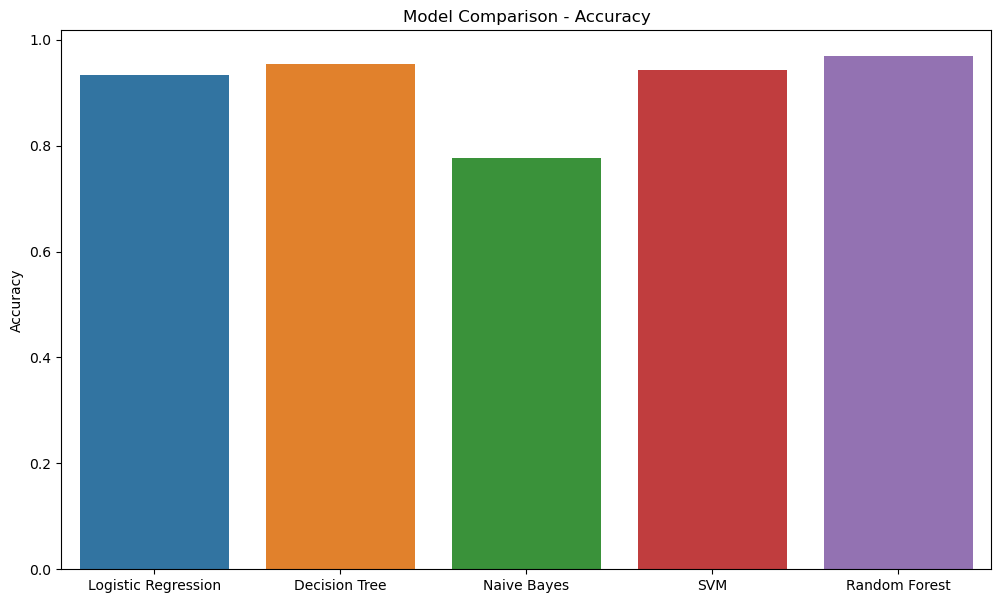

In [17]:
# Collecter les valeurs de précision pour chaque modèle
accuracies = {
    'Logistic Regression': lr_metrics['Accuracy'],
    'Decision Tree': dt_metrics['Accuracy'],
    'Naive Bayes': nb_metrics['Accuracy'],
    'SVM': svm_metrics['Accuracy'],
    'Random Forest': rf_metrics['Accuracy']
}

# Créer un diagramme à barres pour comparer les modèles
plt.figure(figsize=(12, 7))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.show()

In [18]:
model_metrics

{'Logistic Regression': {'Accuracy': 0.9327693175408911,
  'Precision': 0.8935762224352828,
  'Recall': 0.9140241909120628,
  'F1-Score': 0.9036845507433742},
 'Decision Tree': {'Accuracy': 0.9539763113367175,
  'Precision': 0.9299383717158611,
  'Recall': 0.9372343903236352,
  'F1-Score': 0.9335721263432106},
 'Naive Bayes': {'Accuracy': 0.7763113367174281,
  'Precision': 0.8898550724637682,
  'Recall': 0.40143837855508335,
  'F1-Score': 0.5532777652624464},
 'SVM': {'Accuracy': 0.943824027072758,
  'Precision': 0.9105482526450785,
  'Recall': 0.9284079764628964,
  'F1-Score': 0.9193913887989642},
 'Random Forest': {'Accuracy': 0.9694867456288776,
  'Precision': 0.9512866159572746,
  'Recall': 0.960771493952272,
  'F1-Score': 0.9560055298040172}}

In [19]:
def plot_metrics(model_metrics, metric_name, title):
    """
    Graphiques à barres pour une métrique spécifique sur différents modèles.

    Parameters:
    - model_metrics: A dictionary containing model names and their metrics.
    - metric_name: The name of the metric to plot (e.g., 'Accuracy', 'Precision', 'Recall', 'F1-Score').
    - title: The title of the plot.
    """
    plt.figure(figsize=(12, 7))

    model_names = list(model_metrics.keys())
    metric_values = [metrics[metric_name] for metrics in model_metrics.values()]

    sns.barplot(x=model_names, y=metric_values)
    plt.title(title)
    plt.ylabel(metric_name)
    plt.show()

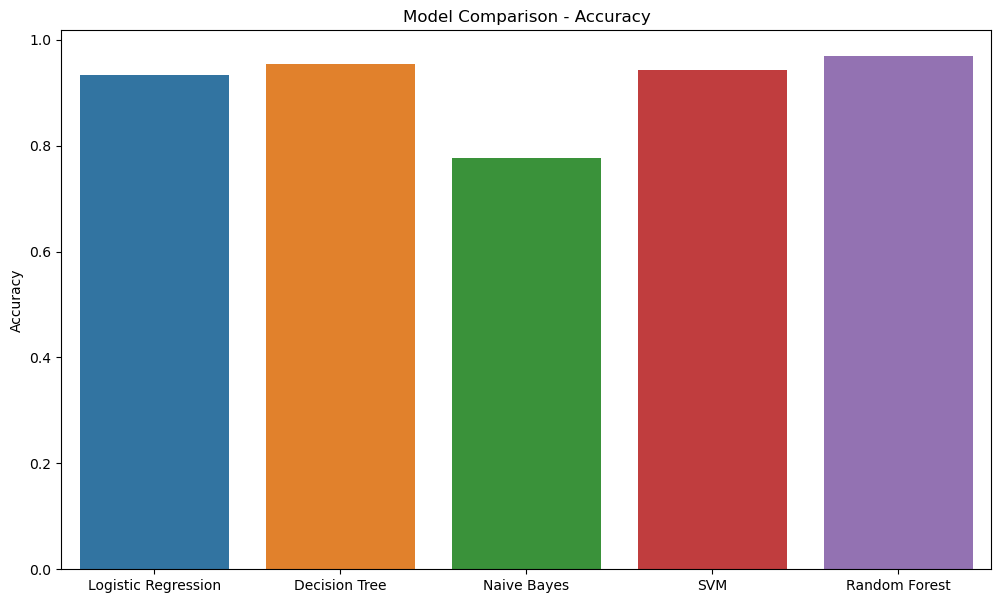

In [20]:
# Comparaison de l'accuracy 
plot_metrics(model_metrics, 'Accuracy', 'Model Comparison - Accuracy')

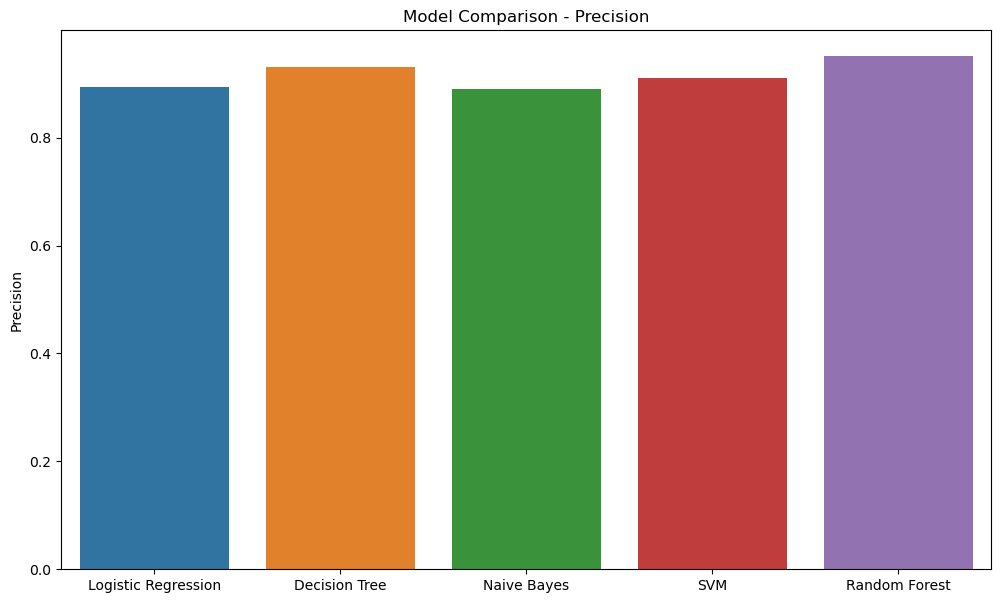

In [21]:
#Comparaison de la précision
plot_metrics(model_metrics, 'Precision', 'Model Comparison - Precision')

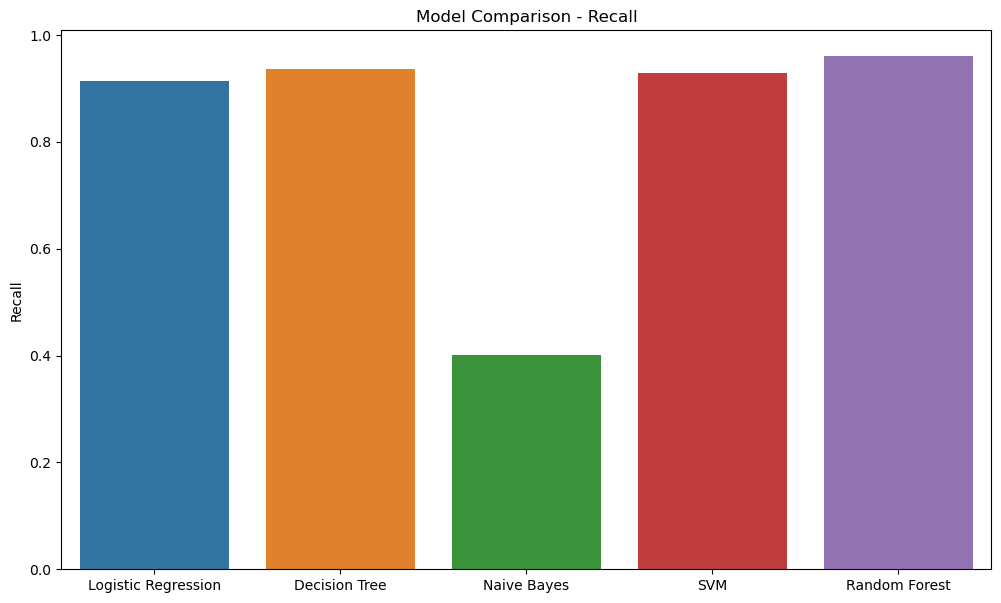

In [22]:
# Comparaison de recall
plot_metrics(model_metrics, 'Recall', 'Model Comparison - Recall')

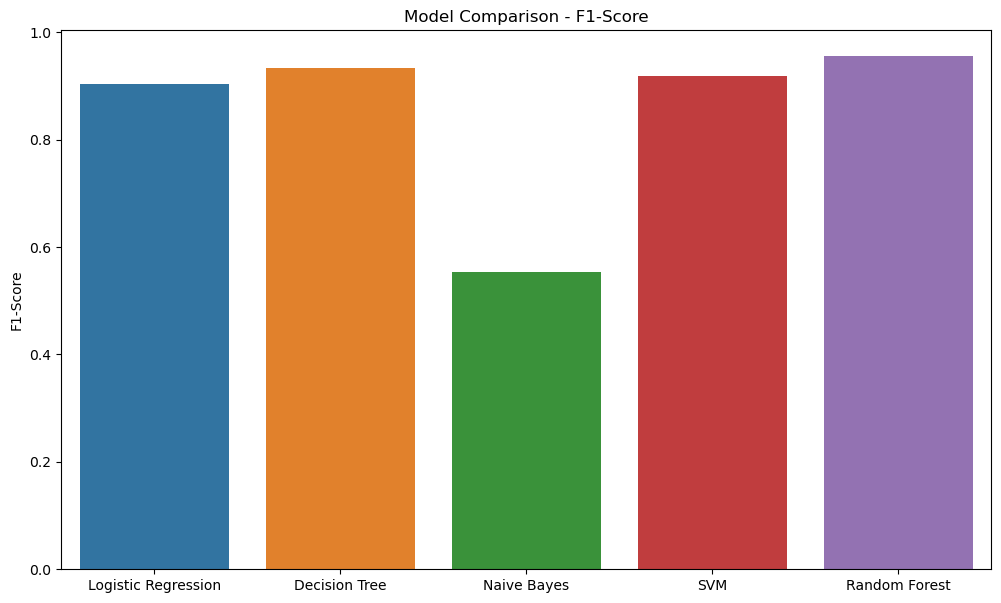

In [23]:
# Comparaison de F1-score
plot_metrics(model_metrics, 'F1-Score', 'Model Comparison - F1-Score')

Réglage des hyperparamètres: Hyperparameter Tuning

In [24]:
def tune_and_run_model(model_type, X_train, X_test, y_train, y_test, param_grid):
    """
    Perform hyperparameter tuning for the specified model and return the tuned model and evaluation metrics.

    Parameters:
    - model_type: A string indicating the type of model ('LR', 'DT', 'NB', 'SVM', 'RF').
    - X_train, X_test, y_train, y_test: Training and testing sets.
    - param_grid: Dictionary specifying the hyperparameter grid for GridSearchCV.

    Returns:
    - tuned_model: Tuned model.
    - metrics: Dictionary containing evaluation metrics.
    """
    if model_type == 'LR':
        base_model = LogisticRegression(random_state=42)
    elif model_type == 'DT':
        base_model = DecisionTreeClassifier(random_state=42)
    elif model_type == 'NB':
        base_model = GaussianNB()
    elif model_type == 'SVM':
        base_model = SVC(random_state=42)
    elif model_type == 'RF':
        base_model = RandomForestClassifier(random_state=42)
    else:
        raise ValueError("Invalid model_type. Choose from 'LR', 'DT', 'NB', 'SVM', 'RF'.")

    # Effectuer le réglage des hyperparamètres à l'aide de GridSearchCV
    grid_search = GridSearchCV(base_model, param_grid, scoring='accuracy', cv=5)
    grid_search.fit(X_train, y_train)

    # Obtenir le meilleur modèle et ses paramètres
    tuned_model = grid_search.best_estimator_

    # Prédiction sur l’ensemble de tests
    y_pred = tuned_model.predict(X_test)

    # Évaluer le modèle optimisé
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Afficher les métriques d'évaluation
    print(f"\n{model_type} Tuned Model Accuracy:", accuracy)
    print(f"\n{model_type} Tuned Model Confusion Matrix:\n", conf_matrix)
    print(f"\n{model_type} Tuned Model Classification Report:\n", classification_rep)

    # Stocker les métriques dans un dictionnaire
    metrics = {
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': classification_rep
    }

    return tuned_model, metrics

# Exercise:

1) Calculer et afficher la précision pour tous les modèles
2) Calculer et afficher le Recall pour tous les modèles
3) Calculer et afficher le score F1 pour tous les modèles
4) Dans un tableau de données(dataframe): afficher l'ensemble des métriques pour les modèles testés 

Dataframe Colonnes  -> Model name, Accuracy, Recall, F1-Score

https://scikit-learn.org/stable/modules/model_evaluation.html

5) Appliquer d'autres algorithmes d'apprentissage automatique et comparer les performances

https://scikit-learn.org/stable/supervised_learning.html

6) Appliquer grid search pour améliorer la performance des modèles

7) Dans un tableau de données(dataframe): Afficher les résultats de performance du modèles après l'utilisation du grid search

8) Rechercher d'autres moyens d'améliorer les performances

9) Analyser et partager les résultats globaux




In [30]:

# # Exemple d'hyperparamètres pour la régression logistique
param_grid_lr = {
     'penalty': ['l1', 'l2'],
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
     'solver': ['liblinear', 'saga'],
#     'max_iter': [1000, 3000, 6000]
}

# # Exécuter le réglage des hyperparamètres pour la régression logistique
lr_tuned_model, lr_tuned_metrics = tune_and_run_model('LR', X_train, X_test, y_train, y_test, ?)

C:\Users\madan\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\madan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\madan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\madan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\madan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\madan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re


LR Tuned Model Accuracy: 0.9327693175408911

LR Tuned Model Confusion Matrix:
 [[10946   666]
 [  526  5592]]

LR Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95     11612
           1       0.89      0.91      0.90      6118

    accuracy                           0.93     17730
   macro avg       0.92      0.93      0.93     17730
weighted avg       0.93      0.93      0.93     17730



In [25]:

# # Exemple d'hyperparamètres pour la régression logistique
# param_grid_lr = {
#     'penalty': ['l1', 'l2'],
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'solver': ['liblinear', 'saga'],
#     'max_iter': [1000, 3000, 6000]
# }

# # Exécuter le réglage des hyperparamètres pour la régression logistique
# lr_tuned_model, lr_tuned_metrics = tune_and_run_model('LR', X_train, X_test, y_train, y_test, ?)

In [26]:
# # Exemple d'hyperparamètres pour l'arbre de décision
# param_grid_dt = {
#     'criterion': ['gini', 'entropy'],
#     'splitter': ['best', 'random'],
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Run hyperparameter tuning for Decision Tree
# dt_tuned_model, dt_tuned_metrics = tune_and_run_model('DT', X_train, X_test, y_train, y_test, ?)


In [27]:
# # Exemple d'hyperparamètres pour Random Forest
# param_grid_rf = {
#     'n_estimators': [50, 100, 200],
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# # Exécuter des hyperparamètres pour l'arbre de décision
# rf_tuned_model, rf_tuned_metrics = tune_and_run_model('RF', X_train, X_test, y_train, y_test, ?)

In [28]:
# # Exemple d'hyperparamètres pour SVM
# param_grid_svm = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'degree': [2, 3, 4],
#     'gamma': ['scale', 'auto', 0.1, 1]
# }

# # Exécuter le réglage des hyperparamètres pour SVM
# svm_tuned_model, svm_tuned_metrics = tune_and_run_model('RF', X_train, X_test, y_train, y_test, ?)